In [1]:
#import relevant libs
import json
import pandas as pd
import config
import mysql.connector
from mysql.connector import errorcode
from datetime import date, datetime, timedelta
import seaborn as sns
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_key = '9b31b50278f34244e86d10da7c8b771e'

In [3]:
##
def movie_call(api_key, num):
#     (f'https://api.themoviedb.org/3/movie/top_rated?api_key={api_key}&language=en-US&page=1')
#     headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get((f'https://api.themoviedb.org/3/movie/top_rated?api_key={api_key}&language=en-US&page={num}'))
    return response

In [4]:
my_data = []
for i in range(1,50):
    movie_call(api_key,i).json()
    my_data.append(movie_call(api_key,i).json())

In [5]:
api_key = '9b31b50278f34244e86d10da7c8b771e'
response = requests.get((f'https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US'))
my_G = response.json()


In [6]:
genre_id = []
genres = []
for genre in my_G['genres']:
    genre_id.append(genre['id'])
    genres.append(genre['name'])
### MAKE INTO DF DATAFRAME

In [7]:
m_genre_id=[]
m_title= []
m_vote_count =[]
m_id = []
m_popularity = []
m_release_date = []
m_vote_average = []

for i in my_data:
    #print(i['results'])
    for item in i['results']:
        m_vote_count.append(item['vote_count'])
        m_genre_id.append(item['genre_ids'])
        m_title.append(item['title'])
        m_id.append(item['id'])
        m_release_date.append(item['release_date'])
        m_vote_average.append(item['vote_average'])
        m_popularity.append(item['popularity'])

In [8]:
def movie_describe(num):
    response = requests.get(f'https://api.themoviedb.org/3/movie/{num}?api_key=9b31b50278f34244e86d10da7c8b771e&language=en-US')
    
    return response.json()



In [9]:
a=[]
for i in m_id:
    a.append(movie_describe(i))


In [10]:
budget = []
revenue = []
movie_names = []
genres_link = []

for i in a:
    budget.append(i['budget'])
    revenue.append(i['revenue'])
    movie_names.append(i['title'])
    genres_link.append(i['genres'])
     


In [11]:
another_one = []
final_one = []
for i in genres_link:
    for j in range(len(i)):
        another_one.append(i[j]['name'])
    final_one.append(another_one)
    another_one = []

In [12]:
data = {'Movie ID' : m_id, 'Title': m_title, 'Genre':final_one, 'Popularity': m_popularity, 'Vote Average': m_vote_average, 'Vote Count': m_vote_count,'Release Date': m_release_date, 'Budget' : budget, 'Revenue': revenue, }
df = pd.DataFrame(data)
df.columns

Index(['Movie ID', 'Title', 'Genre', 'Popularity', 'Vote Average',
       'Vote Count', 'Release Date', 'Budget', 'Revenue'],
      dtype='object')

In [14]:
df['Proft/Loss'] = df['Revenue'] - df['Budget']
df

,Movie ID,Title,Genre,Popularity,Vote Average,Vote Count,Release Date,Budget,Revenue,Proft/Loss
0,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",19.455,8.8,2200,1995-10-20,13200000,100000000,86800000
1,278,The Shawshank Redemption,"[Drama, Crime]",31.143,8.7,14808,1994-09-23,25000000,28341469,3341469
2,238,The Godfather,"[Drama, Crime]",19.765,8.6,11325,1972-03-14,6000000,245066411,239066411
3,496243,Parasite,"[Comedy, Thriller, Drama]",82.026,8.6,2956,2019-05-30,11363000,132338654,120975654
4,424,Schindler's List,"[Drama, History, War]",28.994,8.6,9036,1993-11-30,22000000,321365567,299365567
...,...,...,...,...,...,...,...,...,...,...
975,15764,Sophie's Choice,"[Drama, Romance]",9.462,7.5,426,1982-12-08,12000000,30036000,18036000
976,19067,The Duellists,"[Drama, War]",6.875,7.5,223,1977-08-31,900000,0,-900000
977,8321,In Bruges,"[Comedy, Drama, Crime]",12.027,7.5,2776,2008-02-08,15000000,34533783,19533783
978,532,A Close Shave,"[Family, Animation, Comedy]",8.080,7.5,417,1996-03-07,0,0,0


In [ ]:
###Don't delete

# f=[]
# for i in range(0,len(df)):
#     for j in range(0,len(df['Genre'][i])):
#         f.append({df['Movie ID'][i]:df['Genre'][i][j]})
# f

In [ ]:
###Don't delete
# pri=[]
# for i in f:
#     pri.append((list(i.items())[0][0]))
# len(pri)

In [ ]:
###Don't delete
# gen=[]
# for i in f:
#     gen.append((list(i.items())[0][1]))
# gen

In [15]:
for i in genres:
    df[i] = 0

In [16]:
for i in range(len(df['Title'])):
    for j in genres:
        if j in df['Genre'][i]:
            df[j][i] = 1

/Users/grayangelo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
df.columns

Index(['Movie ID', 'Title', 'Genre', 'Popularity', 'Vote Average',
       'Vote Count', 'Release Date', 'Budget', 'Revenue', 'Proft/Loss',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [18]:
df = df[df.Revenue != 0]
df = df[df.Budget != 0]

In [19]:
df.shape

(553, 29)

In [21]:
movie_tuple = []

for i in range(0, len(df['Title'])):
    movie_tuple.append((int(df['Movie ID'][i]),df['Title'][i],float(df['Popularity'][i]),float(df['Vote Average'][i]),int(df['Vote Count'][i]),df['Release Date'][i], int(df['Budget'][i]),int(df['Revenue'][i]),int(df['Proft/Loss'][i]),int(df['Action'][i]),int(df['Adventure'][i]),int(df['Animation'][i]),int(df['Comedy'][i]),int(df['Crime'][i]),int(df['Documentary'][i]),int(df['Drama'][i]),int(df['Family'][i]),int(df['Fantasy'][i]),int(df['History'][i]),int(df['Horror'][i]),int(df['Music'][i]),int(df['Mystery'][i]),int(df['Romance'][i]),int(df['Science Fiction'][i]),int(df['TV Movie'][i]),int(df['Thriller'][i]),int(df['War'][i]),int(df['Western'][i]))) 


KeyError: 6

# # CREATING TABLE FOR DATABASE

In [100]:
cnx = mysql.connector.connect(
      host = config.my_cred['host'],
      user = config.my_cred['user'],
      passwd = config.my_cred['pw'],
      database = 'REV_DB'
)

cursor = cnx.cursor()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 29 columns):
Movie ID           980 non-null int64
Title              980 non-null object
Genre              980 non-null object
Popularity         980 non-null float64
Vote Average       980 non-null float64
Vote Count         980 non-null int64
Release Date       980 non-null object
Budget             980 non-null int64
Revenue            980 non-null int64
Proft/Loss         980 non-null int64
Action             980 non-null int64
Adventure          980 non-null int64
Animation          980 non-null int64
Comedy             980 non-null int64
Crime              980 non-null int64
Documentary        980 non-null int64
Drama              980 non-null int64
Family             980 non-null int64
Fantasy            980 non-null int64
History            980 non-null int64
Horror             980 non-null int64
Music              980 non-null int64
Mystery            980 non-null int64
Romance       

In [91]:
#CREATE TABLE
cursor.execute("""USE REV_DB""")
TABLES = {}
TABLES['movie_data'] = (
    "CREATE TABLE movie_data ("
    "  id int NOT NULL AUTO_INCREMENT,"
    "  Movie_ID int (255),"
    "  Title varchar(255),"
    "  Popularity float NOT NULL,"
    "  Vote_Average float NOT NULL,"
    "  Vote_Count int(255),"
    "  Release_Date DATE,"
    "  Budget int(20),"
    "  Revenue int(20),"
    "  Profit_Loss int(255),"
    "  Action int (1),"
    "  Adventure int(1),"
    "  Animation int(1),"
    "  Comedy int(1),"
    "  Crime int (1),"
    "  Documentary int (1),"
    "  Drama int (1),"
    "  Family int (1),"
    "  Fantasty int (1),"
    "  History int (1),"
    "  Horror int (1),"
    "  Music int (1),"
    "  Mystery int (1),"
    "  Romance int (1),"
    "  Science_Fiction int (1),"
    "  TV_Movie int (1),"
    "  Thriller int (1),"
    "  War int (1),"
    "  Western int (1),"
    "  PRIMARY KEY (id)"
    ") ENGINE=InnoDB")

In [92]:
TABLES['movie_data']

'CREATE TABLE movie_data (  id int NOT NULL AUTO_INCREMENT,  Movie_ID int (255),  Title varchar(255),  Popularity float NOT NULL,  Vote_Average float NOT NULL,  Vote_Count int(255),  Release_Date DATE,  Budget int(20),  Revenue int(20),  Profit_Loss int(255),  Action int (1),  Adventure int(1),  Animation int(1),  Comedy int(1),  Crime int (1),  Documentary int (1),  Drama int (1),  Family int (1),  Fantasty int (1),  History int (1),  Horror int (1),  Music int (1),  Mystery int (1),  Romance int (1),  Science_Fiction int (1),  TV_Movie int (1),  Thriller int (1),  War int (1),  Western int (1),  PRIMARY KEY (id)) ENGINE=InnoDB'

In [93]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

cursor.close()
cnx.close()

Creating table movie_data: OK


# # INSERT DATA INTO TABLE

In [23]:
df.size

16037

In [94]:
cnx = mysql.connector.connect(
      host = config.my_cred['host'],
      user = config.my_cred['user'],
      passwd = config.my_cred['pw'],
      database = 'REV_DB'
)

cursor = cnx.cursor()
def db_insert_movies(cnx, cursor, movies):
#     cursor.execute("""USE REV_DB""")
    stmt = ("INSERT INTO movie_data (Movie_ID, Title, Popularity, Vote_Average, Vote_Count, Release_Date, Budget, Revenue, Profit_Loss, Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasty, History, Horror, Music, Mystery, Romance, Science_Fiction, TV_Movie, Thriller, War, Western) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)")
    cursor.executemany(stmt, movies)
    cnx.commit()

In [60]:
movie_tuple
df.head()

,Movie ID,Title,Genre,Popularity,Vote Average,Vote Count,Release Date,Budget,Revenue,Proft/Loss,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",19.455,8.8,2200,1995-10-20,13200000,100000000,86800000,...,0,0,0,0,1,0,0,0,0,0
1,278,The Shawshank Redemption,"[Drama, Crime]",31.143,8.7,14808,1994-09-23,25000000,28341469,3341469,...,0,0,0,0,0,0,0,0,0,0
2,238,The Godfather,"[Drama, Crime]",19.765,8.6,11325,1972-03-14,6000000,245066411,239066411,...,0,0,0,0,0,0,0,0,0,0
3,496243,Parasite,"[Comedy, Thriller, Drama]",82.026,8.6,2956,2019-05-30,11363000,132338654,120975654,...,0,0,0,0,0,0,0,1,0,0
4,424,Schindler's List,"[Drama, History, War]",28.994,8.6,9036,1993-11-30,22000000,321365567,299365567,...,1,0,0,0,0,0,0,0,1,0


In [61]:
df['History'].sum()

51

In [65]:
df.columns

Index(['Movie ID', 'Title', 'Genre', 'Popularity', 'Vote Average',
       'Vote Count', 'Release Date', 'Budget', 'Revenue', 'Proft/Loss',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [72]:
df['TV Movie'].unique()

array([0])

In [73]:
sublist = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western']

In [127]:
final_list = []
for i in sublist:
    new_df = df[df[i] == 1]
    new_df['Proft/Loss'].sum()
#     new_df['Proft/Loss'].sum()/len(new_df)
    final_list.append(new_df['Proft/Loss'].sum()/len(new_df))
    

    

In [129]:
rev1 = []
for i in sublist:
    new_df = df[df[i] == 1]
    new_df['Revenue'].sum()
#     new_df['Proft/Loss'].sum()/len(new_df)
    rev1.append(new_df['Revenue'].sum()/len(new_df))

In [111]:
budgets = []


for i in sublist:
    new_df = df[df[i] == 1]
    new_df['Budget'].sum()
#     new_df['Proft/Loss'].sum()/len(new_df)
    budgets.append(new_df['Budget'].sum()/len(new_df))

In [112]:
budgets

[78084214.36585365,
 85081302.64285715,
 80127448.79245283,
 34603646.20338983,
 24621804.519230768,
 22204455.77984085,
 75312395.81355932,
 75928309.0909091,
 27496653.49019608,
 6328157.92,
 16100053.333333334,
 20565552.672727272,
 19569141.50617284,
 86844804.3478261,
 26445185.412844036,
 25039674.685714286,
 16385974.333333334]

In [114]:
df23 = pd.DataFrame(sublist,budgets).reset_index()
df23.columns = ['Budget','Genres']
df23

,Budget,Genres
0,7.808421e+07,Action
1,8.508130e+07,Adventure
2,8.012745e+07,Animation
3,3.460365e+07,Comedy
4,2.462180e+07,Crime
5,2.220446e+07,Drama
6,7.531240e+07,Family
7,7.592831e+07,Fantasy
8,2.749665e+07,History
9,6.328158e+06,Horror


Text(0.5, 1.0, 'Average Budget by Genre')

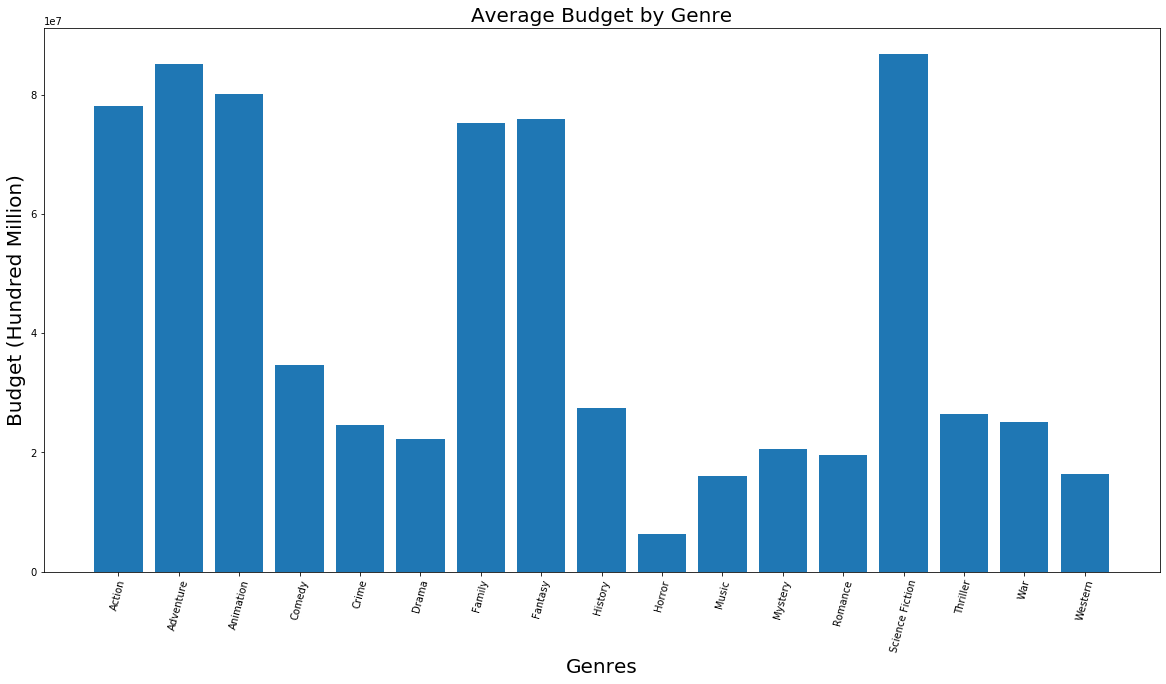

In [116]:
plt.figure(figsize=(20,10))
plt.bar(x = df23['Genres'], height = df23['Budget'])
plt.xticks(rotation=75)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Budget (Hundred Million)', fontsize = 20)
plt.title('Average Budget by Genre', fontsize = 20)

In [ ]:
df22 = pd.DataFrame(sublist,final_list).reset_index()
df22.columns = ['Average Profit','Genres']
df22.describe()

In [125]:
budgets

[78084214.36585365,
 85081302.64285715,
 80127448.79245283,
 34603646.20338983,
 24621804.519230768,
 22204455.77984085,
 75312395.81355932,
 75928309.0909091,
 27496653.49019608,
 6328157.92,
 16100053.333333334,
 20565552.672727272,
 19569141.50617284,
 86844804.3478261,
 26445185.412844036,
 25039674.685714286,
 16385974.333333334]

In [130]:
rev1

[425369384.64634144,
 486064373.0714286,
 373277913.5471698,
 189474271.90677965,
 107823340.01923077,
 112651173.91246684,
 375138668.15254235,
 393896627.8545455,
 106397464.90196079,
 103904244.68,
 177288259.4,
 100994790.2909091,
 124817267.8888889,
 467284958.5,
 140685306.86238533,
 121111933.45714286,
 78419409.57142857]

In [123]:
df22 = pd.DataFrame(sublist,final_list).reset_index()

df22

ValueError: Shape of passed values is (17, 1), indices imply (0, 1)

Text(0.5, 1.0, 'Profit Growth by Genre')

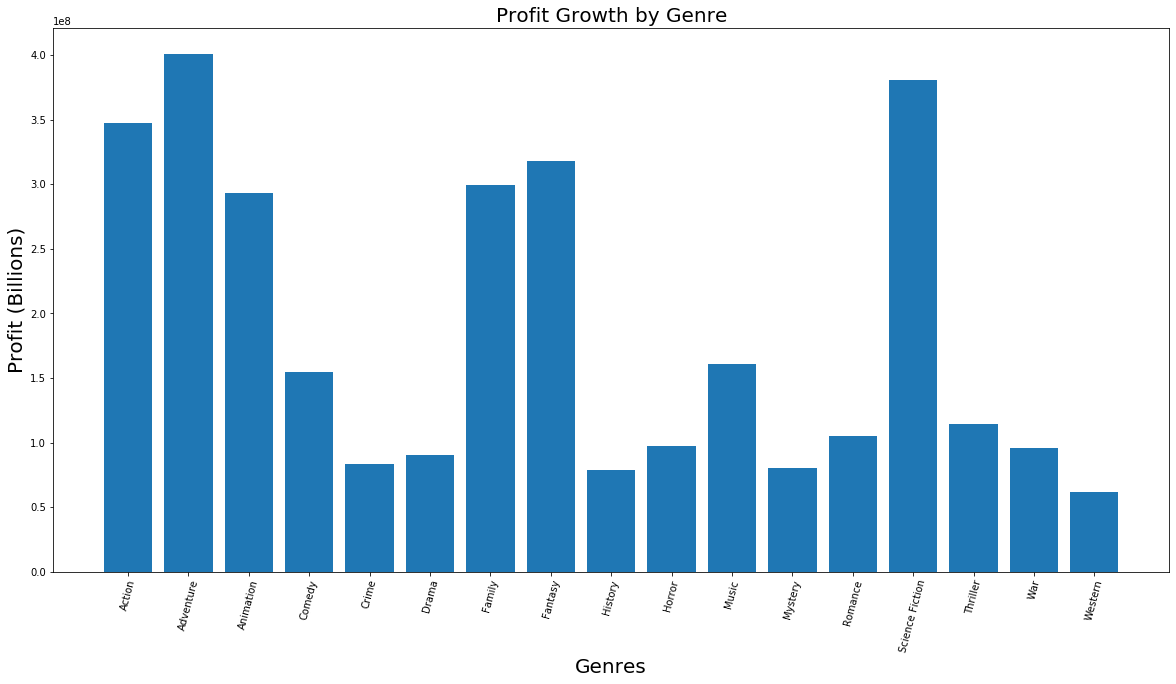

In [100]:

plt.figure(figsize=(20,10))
plt.bar(x = df22['Genres'], height = df22['Average Profit'])
plt.xticks(rotation=75)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Profit (Billions)', fontsize = 20)
plt.title('Profit Growth by Genre', fontsize = 20)

In [79]:
# x_axis= pd.DataFrame(sublist)
# x_axis['y_axis'] = final_list

In [80]:
x_axis[0]

,0,y_axis
0,Action,3.472852e+08
1,Adventure,4.009831e+08
2,Animation,2.931505e+08
3,Comedy,1.548706e+08
4,Crime,8.320154e+07
5,Drama,9.044672e+07
6,Family,2.998263e+08
7,Fantasy,3.179683e+08
8,History,7.890081e+07
9,Horror,9.757609e+07


In [101]:
df

,Movie ID,Title,Genre,Popularity,Vote Average,Vote Count,Release Date,Budget,Revenue,Proft/Loss,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",19.455,8.8,2200,1995-10-20,13200000,100000000,86800000,...,0,0,0,0,1,0,0,0,0,0
1,278,The Shawshank Redemption,"[Drama, Crime]",31.143,8.7,14808,1994-09-23,25000000,28341469,3341469,...,0,0,0,0,0,0,0,0,0,0
2,238,The Godfather,"[Drama, Crime]",19.765,8.6,11325,1972-03-14,6000000,245066411,239066411,...,0,0,0,0,0,0,0,0,0,0
3,496243,Parasite,"[Comedy, Thriller, Drama]",82.026,8.6,2956,2019-05-30,11363000,132338654,120975654,...,0,0,0,0,0,0,0,1,0,0
4,424,Schindler's List,"[Drama, History, War]",28.994,8.6,9036,1993-11-30,22000000,321365567,299365567,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,5723,Once,"[Drama, Music, Romance]",7.824,7.5,774,2007-03-23,160000,20710513,20550513,...,0,0,1,0,1,0,0,0,0,0
973,783,Gandhi,"[Drama, History]",13.038,7.5,1301,1982-11-30,22000000,77737889,55737889,...,1,0,0,0,0,0,0,0,0,0
974,11901,High Plains Drifter,[Western],9.677,7.5,526,1973-04-19,5500000,15700000,10200000,...,0,0,0,0,0,0,0,0,0,1
975,15764,Sophie's Choice,"[Drama, Romance]",9.462,7.5,426,1982-12-08,12000000,30036000,18036000,...,0,0,0,0,1,0,0,0,0,0


In [67]:
new_df = df[df['History'] == 1]
new_df
# new_df['Proft/Loss'].sum()

,Movie ID,Title,Genre,Popularity,Vote Average,Vote Count,Release Date,Budget,Revenue,Proft/Loss,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4,424,Schindler's List,"[Drama, History, War]",28.994,8.6,9036,1993-11-30,22000000,321365567,299365567,...,1,0,0,0,0,0,0,0,1,0
117,437068,A Taxi Driver,"[Drama, History, Action]",7.807,8.2,203,2017-08-02,12820000,81927980,69107980,...,1,0,0,0,0,0,0,0,0,0
138,11645,Ran,"[Action, Drama, History]",11.786,8.1,687,1985-06-01,11500000,4069653,-7430347,...,1,0,0,0,0,0,0,0,0,0
154,857,Saving Private Ryan,"[Drama, History, War]",23.224,8.1,9378,1998-07-24,70000000,481840909,411840909,...,1,0,0,0,0,0,0,0,1,0
171,324786,Hacksaw Ridge,"[Drama, History, War]",18.222,8.1,7368,2016-10-07,40000000,175302354,135302354,...,1,0,0,0,0,0,0,0,1,0
174,1955,The Elephant Man,"[Drama, History]",10.122,8.1,1719,1980-10-02,5000000,26010864,21010864,...,1,0,0,0,0,0,0,0,0,0
178,530915,1917,"[War, Drama, History]",222.017,8.1,1530,2019-12-10,100000000,200483309,100483309,...,1,0,0,0,0,0,0,0,1,0
183,387,Das Boot,"[Drama, History, War]",11.593,8.1,1090,1981-09-16,14000000,85000000,71000000,...,1,0,0,0,0,0,0,0,1,0
190,205596,The Imitation Game,"[History, Drama, Thriller, War]",26.106,8.1,11384,2014-11-14,14000000,233555708,219555708,...,1,0,0,0,0,0,0,1,1,0
192,821,Judgment at Nuremberg,"[Drama, History]",8.873,8.1,351,1961-12-01,3000000,10000000,7000000,...,1,0,0,0,0,0,0,0,0,0


In [63]:
4023941382 / 51

78900811.41176471

In [95]:
db_insert_movies(cnx, cursor, movie_tuple)

# VISUALIZATION

In [38]:
df.describe()

,Movie ID,Popularity,Vote Average,Vote Count,Budget,Revenue,Proft/Loss,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,553.000000,553.000000,553.000000,553.000000,5.530000e+02,5.530000e+02,5.530000e+02,553.000000,553.000000,553.000000,...,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.0,553.000000,553.000000,553.000000
mean,71119.254973,15.497186,7.830380,4194.580470,3.340232e+07,1.805963e+08,1.471940e+08,0.148282,0.177215,0.095841,...,0.092224,0.045208,0.027125,0.099458,0.146474,0.083183,0.0,0.197107,0.063291,0.037975
std,133017.619835,15.739578,0.274949,4440.197548,5.232028e+07,3.013050e+08,2.598207e+08,0.355701,0.382196,0.294639,...,0.289604,0.207948,0.162594,0.299546,0.353901,0.276408,0.0,0.398174,0.243706,0.191308
min,11.000000,2.776000,7.500000,200.000000,1.000000e+00,5.000000e+00,-1.583926e+08,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,629.000000,9.329000,7.600000,863.000000,3.600000e+06,1.649108e+07,8.179814e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,4203.000000,11.890000,7.800000,2268.000000,1.300000e+07,5.393930e+07,4.000000e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,44214.000000,17.225000,8.000000,6459.000000,3.400000e+07,1.833165e+08,1.541163e+08,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,546554.000000,222.017000,8.800000,24355.000000,3.560000e+08,2.797801e+09,2.441801e+09,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [44]:
genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [59]:
df.groupby('Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Music',  'Romance','Science Fiction')

TypeError: groupby() takes from 1 to 9 positional arguments but 13 were given

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(x3,y3)
plt.xticks(rotation=75)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Revenue (Billions)', fontsize = 20)
plt.title('Top Grossing 2017', fontsize = 20)

In [107]:
new_df12 = df[df['Science Fiction'] == 1]
len(new_df12['Title'])

46

In [105]:
# new_df12['Proft/Loss']

Text(0.5, 1.0, 'Top Scifi Profit/Loss')

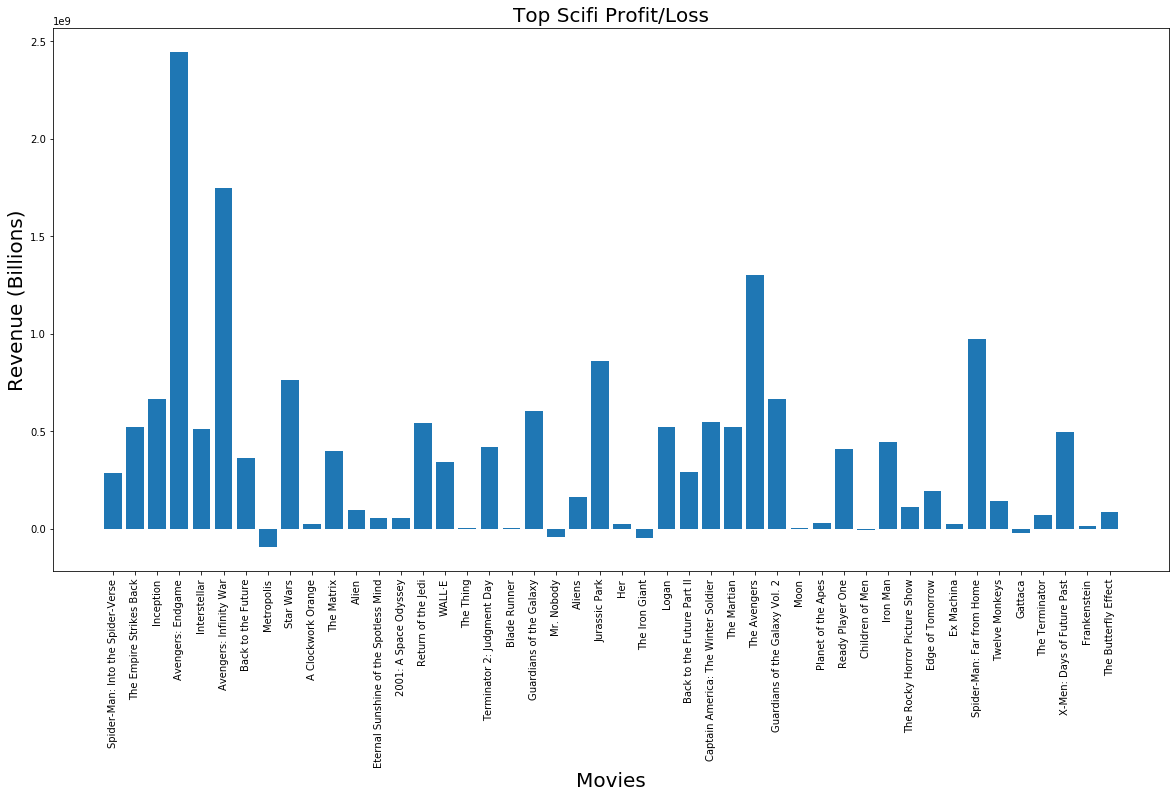

In [120]:
plt.figure(figsize=(20,10))
plt.bar(new_df12['Title'], new_df12['Proft/Loss'])
plt.xticks(rotation=90)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Revenue (Billions)', fontsize = 20)
plt.title('Top Scifi Profit/Loss', fontsize = 20)

In [47]:
#POPULARITY BY GENRE
movie_db_dict = dict.fromkeys(genres, 0.0)
movie_db_dict


{'Action': 0.0,
 'Adventure': 0.0,
 'Animation': 0.0,
 'Comedy': 0.0,
 'Crime': 0.0,
 'Documentary': 0.0,
 'Drama': 0.0,
 'Family': 0.0,
 'Fantasy': 0.0,
 'History': 0.0,
 'Horror': 0.0,
 'Music': 0.0,
 'Mystery': 0.0,
 'Romance': 0.0,
 'Science Fiction': 0.0,
 'TV Movie': 0.0,
 'Thriller': 0.0,
 'War': 0.0,
 'Western': 0.0}

In [57]:
for i in range(len(df['Title'])):
    print(i)
    for j in genres:

        if df[j][i] == 1:
            movie_db_dict[j] += (float(df['Popularity'][i])/(df[j].sum()))



0
1
2
3
4
5
6


KeyError: 6

In [ ]:
normalized_popularity = pd.Series(movie_db_dict)
normalized_popularity


In [ ]:
sorted_thing2 = normalized_popularity.sort_values(ascending=False)
sorted_thing2

In [ ]:
bar2_genres = sns.barplot(x=sorted_thing2, y=sorted_thing2.index, color = '#7474E2', orient = 'h') #general bar graph, given data
bar2_genres.axes.set_title('Popularity Ranking Per Genre', fontsize = 19.5, pad = 10) # title info
bar2_genres.set_xlabel('Popularity Ranking', fontsize = 18, labelpad = 10) # xlabel info
bar2_genres.set_ylabel('Genres', fontsize = 17.5, labelpad = 8) # ylabel info
sns.set(rc = {'figure.figsize':(10,8)}) # change graph size